In [18]:
import numpy as np
import pandas as pd
import sklearn as datasets
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
ad = pd.read_csv('Advertising.csv')
ad.head()

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [19]:
ad.columns

Index(['Unnamed: 0', 'TV', 'radio', 'newspaper', 'sales'], dtype='object')

In [20]:
ad1 = ad.drop('Unnamed: 0', axis = 'columns')
ad1.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [21]:
ad1.isnull().any(axis=0)

TV           False
radio        False
newspaper    False
sales        False
dtype: bool

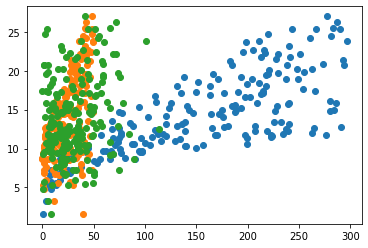

In [22]:
import matplotlib.pyplot as plt
%matplotlib inline
x = ad1[['TV', 'radio', 'newspaper']]
y = ad1['sales']
plt.plot(x, y, "o")
plt.show()

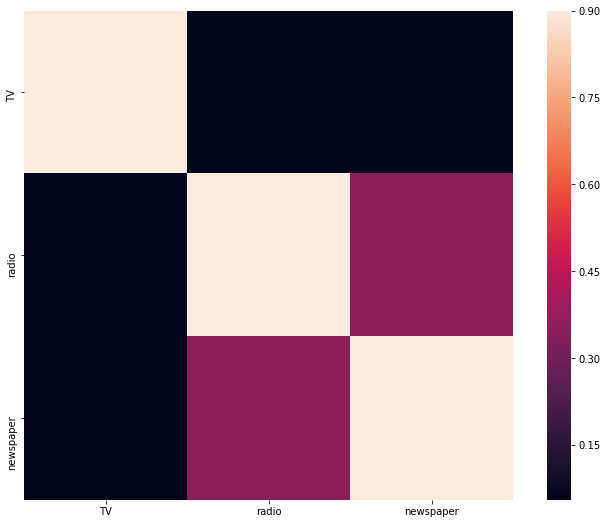

In [23]:
import seaborn as sns
X = ad1[['TV', 'radio', 'newspaper']]
corrmat = X.corr()
plt.subplots(figsize=(12,9))
sns.heatmap(corrmat, vmax=0.9, square=True)

In [24]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [25]:
alphas = np.array([20,10,5,1,1e-2,1e-3,1e-4,1e-8,1e-10,1e-15])
model1 = Ridge()
grid1 = GridSearchCV(estimator=model1, param_grid=dict(alpha=alphas), cv=5, scoring='neg_mean_squared_error')
grid1.fit(X_train, y_train)
print(grid1)
print(grid1.best_score_)
print(grid1.best_estimator_.alpha)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': array([2.e+01, 1.e+01, 5.e+00, 1.e+00, 1.e-02, 1.e-03, 1.e-04, 1.e-08,
       1.e-10, 1.e-15])},
             scoring='neg_mean_squared_error')
-2.943392602590042
1e-15


In [26]:
ridge1 = Ridge(alpha=1e-15)
ridge1.fit(X_train, y_train)

print ("R^2 for test set: "),
print (ridge1.score(X_test, y_test))

print ('_'*50)

print ("Rss: %.2f" % np.sum((ridge1.predict(X_test) - y_test) ** 2))

R^2 for test set: 
0.899438024100912
__________________________________________________
Rss: 126.96


In [27]:
ridge1.coef_

array([0.04472952, 0.18919505, 0.00276111])

In [28]:
def get_form(model, colnames):
    result = pd.DataFrame(model.coef_).transpose()
    result.columns = colnames
    result['intercept'] = model.intercept_
    result = result.transpose()
    result.columns = ['coefficient']
    return result

In [29]:
colnames = ['TV', 'radio', 'newspaper']
get_form(ridge1, colnames)

,coefficient
TV,0.044730
radio,0.189195
newspaper,0.002761
intercept,2.979067


In [30]:
from sklearn.linear_model import Lasso
alphas = np.array([20,10,5,1,1e-2,1e-3,1e-4,1e-8,1e-10,1e-15])
model2 = Lasso()
grid2 = GridSearchCV(estimator=model2, param_grid=dict(alpha=alphas),cv=5, scoring='neg_mean_squared_error')
grid2.fit(X_train, y_train)
print(grid2)
print(grid2.best_score_)
print(grid2.best_estimator_.alpha)

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': array([2.e+01, 1.e+01, 5.e+00, 1.e+00, 1.e-02, 1.e-03, 1.e-04, 1.e-08,
       1.e-10, 1.e-15])},
             scoring='neg_mean_squared_error')
-2.9195474714256
1.0


/Users/shuozhang/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 147.8233680248915, tolerance: 0.33806696875
  positive)
/Users/shuozhang/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 168.41669557518773, tolerance: 0.31261087500000007
  positive)
/Users/shuozhang/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 136.68547668666966, tolerance: 0.3430815000000001
  positive)


In [31]:
lasso1 = Lasso(alpha=1.0)
lasso1.fit(X_train, y_train)

print ("R^2 for test set:"),
print (lasso1.score(X_test, y_test))

print ('-'*50)

print ("RSS: %.2f" % np.sum((lasso1.predict(X_test) - y_test) ** 2))

R^2 for test set:
0.9004013443377963
--------------------------------------------------
RSS: 125.75


In [32]:
get_form(lasso1, colnames)

,coefficient
TV,0.044631
radio,0.185350
newspaper,0.001422
intercept,3.121944


In [17]:
# Lasso is better with lower rss and higher r2